In [62]:
import os
import joblib
import pickle
from IPython.display import Audio


import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
import tensorflow as tf
#import keras

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn import metrics


from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dense, Dropout , BatchNormalization
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


print(tf.__version__)

2.5.0


In [7]:
split_rate = 0.2
seed = 42
n_cores = int(os.cpu_count()/2)
print(f'The half of the number of threads available is : {n_cores}')

The half of the number of threads available is : 8


In [8]:
df = pd.read_csv('pd_speech_features.csv', header=1)
df.set_index("id", inplace = True)
df

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
id,,,,,,,,,,,,,,,,,,,,,
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0


# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 251
Columns: 754 entries, gender to class
dtypes: float64(749), int64(5)
memory usage: 4.4 MB


In [10]:
df.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
id,,,,,,,,,,,,,,,,,,,,,
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [11]:
df.describe()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,2.290134e-05,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,6.860000e-07,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,5.260000e-06,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,9.530000e-06,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,1.832500e-05,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,2.564800e-04,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [12]:
print(f'Number of duplicated columns : {df.columns.duplicated().sum()}')

df = df.loc[:,~df.columns.duplicated()] # drop duplicated columns if present

Number of duplicated columns : 0


In [13]:
df.apply(lambda x: sum(x.isnull()),axis=0) # Checking for missing values

gender                       0
PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 754, dtype: int64

In [14]:
df=df.sample(frac=1).reset_index(drop=True)# Resample data
df.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.84137,0.73558,0.41782,234,233,0.008253,0.000081,0.00177,0.000015,...,43.0289,37.1365,36.2467,32.6067,45.4335,48.1864,40.1460,39.5734,87.5750,1
1,1,0.82006,0.66421,0.37479,291,290,0.006629,0.000084,0.00154,0.000010,...,39.3346,53.8215,17.3874,11.8498,11.4329,6.3404,4.1468,3.9736,3.5569,0
2,1,0.11907,0.70259,0.57310,356,354,0.005412,0.000742,0.00173,0.000009,...,11.0121,9.2407,2.8454,2.9304,2.7041,4.0528,10.1490,12.7809,71.2901,1
3,1,0.85117,0.79935,0.52510,193,192,0.009985,0.000081,0.00169,0.000017,...,1.5725,1.6191,2.8865,5.4736,8.4123,10.7472,9.3260,6.0038,4.8524,1
4,1,0.84136,0.80616,0.59646,243,242,0.007971,0.000045,0.00128,0.000010,...,1.5446,2.3224,7.6135,6.1476,8.2389,22.7715,20.5733,25.3162,60.4475,1


In [15]:
fig = px.histogram(df, x = 'class', color = 'gender', barmode = 'group', title = 'Class repartition betwenn genders')
fig.show()
print(f'Unbalanced data')

Unbalanced data


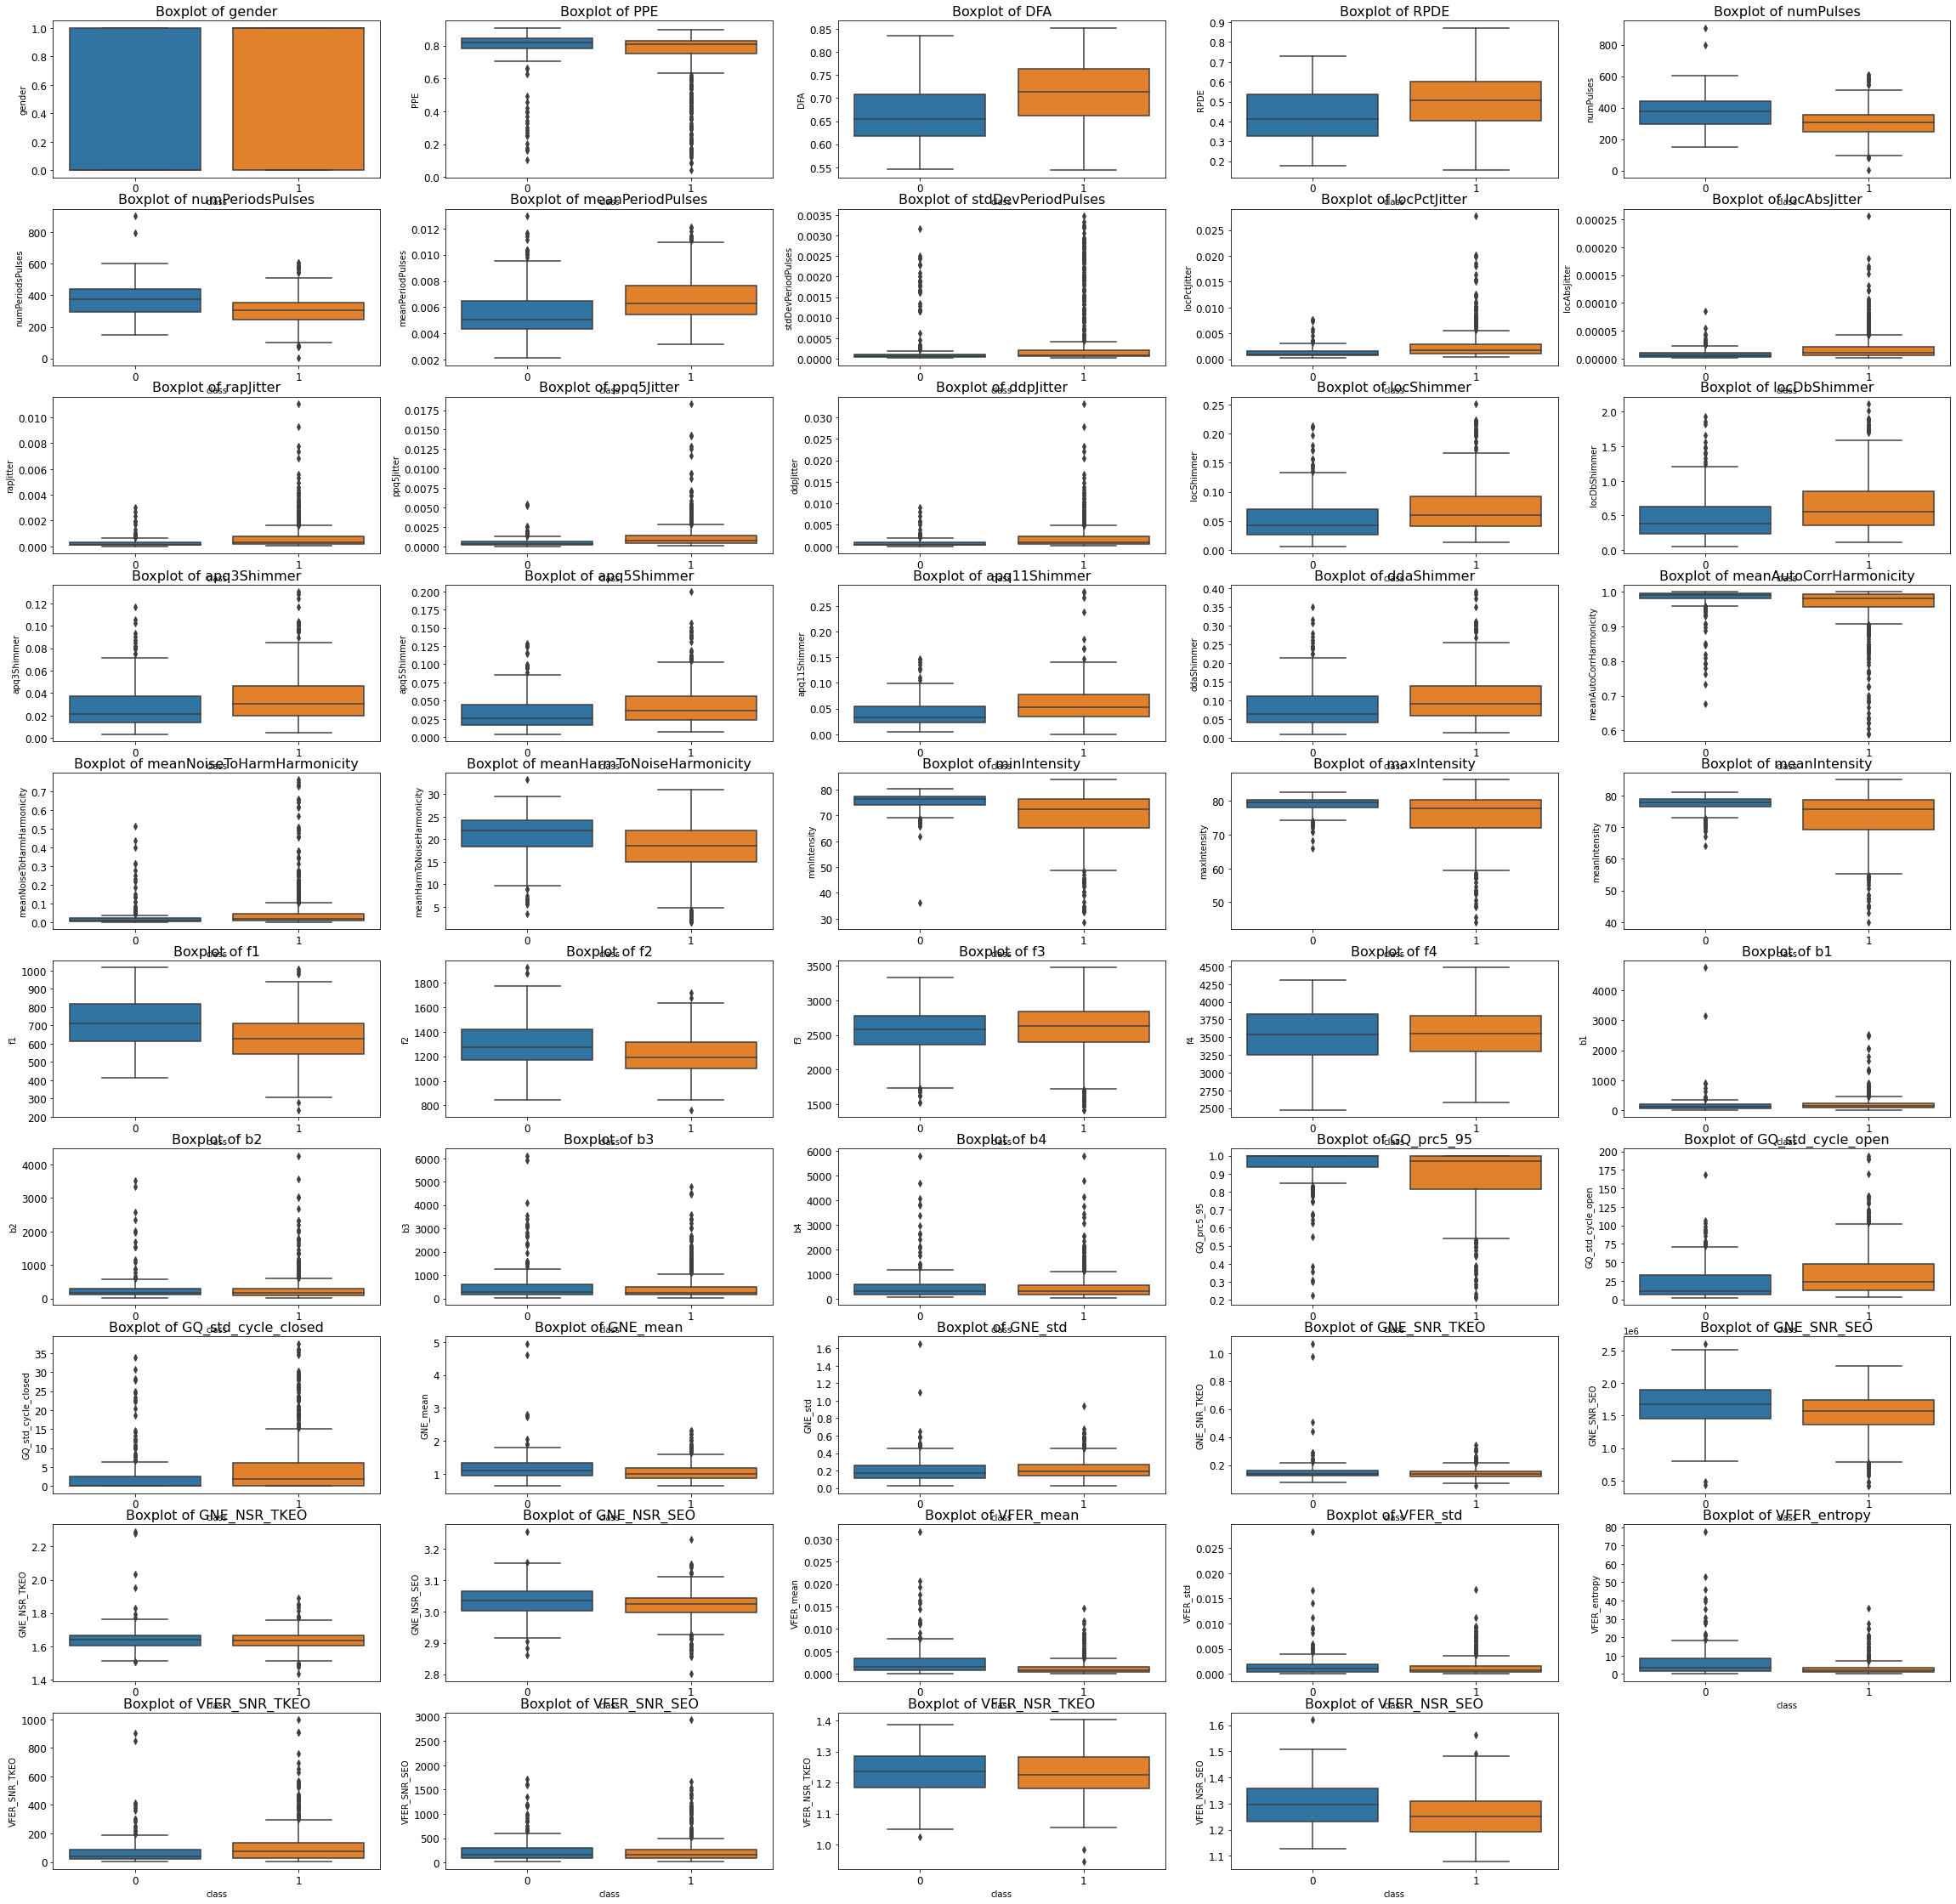

In [16]:
#Box Plotting All features distribution corresponding Target column
plt.figure(figsize=(40,40))
for idx, c in enumerate(df.columns[:49]):
    plt.subplot(10,5,idx+1)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['class'])
plt.show()

# Machine Learning

## Data Splitting

In [17]:
features = df.drop('class', axis=1)
labels = df['class']

In [18]:
print(f'Shape of features : {features.shape}')
print(f'Shape of labels : {labels.shape}')

Shape of features : (756, 753)
Shape of labels : (756,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = split_rate, random_state = seed, stratify = labels)

In [20]:
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of y_train : {y_train.shape}')

print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (604, 753)
Shape of y_train : (604,)
Shape of X_test : (152, 753)
Shape of y_test : (152,)


In [21]:
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.2, random_state = seed)

In [22]:
# print(f'Shape of X_test : {X_test.shape}')
# print(f'Shape of y_test : {y_test.shape}')

# print(f'Shape of X_val : {X_val.shape}')
# print(f'Shape of y_val : {y_val.shape}')


## Scaling Data

In [23]:
scaler = StandardScaler() # Substract mean and divide by standard deviation

df_scaled = scaler.fit_transform(df.drop('class', axis  = 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#X_val = scaler.fit_transform(X_val)

### Logistic Regression

In [ ]:
LR_classifier = LogisticRegression(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

LR_parameters = [{ 'penalty' : ['l1','l2'],
                    'C' : [0.01,0.1,1.0,2.0,5.0,10.0],
                    'solver' : ['liblinear','newton-cg','lbfgs','saga'],
                    'max_iter' : [100,200,500]}]

LR_grid_search = GridSearchCV(estimator = LR_classifier, param_grid = LR_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
LR_grid_search = LR_grid_search.fit(X_train, y_train)

In [ ]:
print(f'Best logistic regressor is : {LR_grid_search.best_estimator_}, \n  with a score of : {LR_grid_search.best_score_}')


In [ ]:
y_pred_LR =  LR_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_LR) 
print (cm)

print(classification_report(y_test,y_pred_LR))
print("Accuracy:",accuracy_score(y_test, y_pred_LR)*100)

### SVM

In [ ]:
SVM_classifier = SVC(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

SVM_parameters = [{ 'kernel' : ['linear','poly','rbf','sigmoid'],
                    'C' : [0.01,0.1,1.0,2.0,5.0,10.0],
                    'decision_function_shape' : ['ovo','ovr']}]

SVM_grid_search = GridSearchCV(estimator = SVM_classifier, param_grid = SVM_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
SVM_grid_search = SVM_grid_search.fit(X_train, y_train)

In [ ]:
print(f'Best SVM is : {SVM_grid_search.best_estimator_}, \n  with a score of : {SVM_grid_search.best_score_}')


In [ ]:
y_pred_SVM =  SVM_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_SVM) 
print (cm)

print(classification_report(y_test,y_pred_SVM))
print("Accuracy:",accuracy_score(y_test, y_pred_SVM)*100)

### Gaussian Naive Bayes

In [ ]:
GNB_classifier = GaussianNB()
GNB_grid_search = GNB_classifier.fit(X_train, y_train)

In [ ]:
y_pred_GNB =  GNB_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_GNB) 
print (cm)

print(classification_report(y_test,y_pred_GNB))
print("Accuracy:",accuracy_score(y_test, y_pred_GNB)*100)

### Decision Tree

In [ ]:
DT_classifier = DecisionTreeClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

DT_parameters = [{ 'criterion' : ['gini','entropy'],
                    'splitter' : ['best','random'],
                    'max_depth' : [10,20,50,100,1000],
                    'min_samples_split' : [10,15,20,50],
                    'max_features' : ['auto', 'sqrt', 'log2']
                    }]

DT_grid_search = GridSearchCV(estimator = DT_classifier, param_grid = DT_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
DT_grid_search = DT_grid_search.fit(X_train, y_train)
print('DT trained')

In [ ]:
print(f'Best Decison Tree is : {DT_grid_search.best_estimator_}, \n  with a score of : {DT_grid_search.best_score_}')
print('\n')

y_pred_DT =  DT_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_DT) 
print (cm)

print(classification_report(y_test,y_pred_DT))
print("Accuracy:",accuracy_score(y_test, y_pred_DT)*100)

In [ ]:
RF_classifier = RandomForestClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

RF_parameters = [{ 'n_estimators' : [10,20,50,100,250,500],
                    'criterion' : ['gini', 'entropy'],
                    'max_depth' : [10,20,50,100,1000],
                    'min_samples_split' : [10,15,20,50],
                    'max_features' : ['auto', 'sqrt', 'log2']
                    }]

RF_grid_search = GridSearchCV(estimator = RF_classifier, param_grid = RF_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
RF_grid_search = RF_grid_search.fit(X_train, y_train)
print('RF trained')




In [ ]:
print(f'Best Random Forest is : {RF_grid_search.best_estimator_}, \n  with a score of : {RF_grid_search.best_score_}')
print('\n')

y_pred_RF =  RF_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_RF) 
print (cm)

print(classification_report(y_test,y_pred_RF))
print("Accuracy:",accuracy_score(y_test, y_pred_RF)*100)

### Bagging Claissifier

In [ ]:
BG_classifier = BaggingClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

BG_parameters = [{ 'n_estimators' : [10,20,50,100,250,500],
                    'max_features' : [10,20,50,100]
                    }]

BG_grid_search = GridSearchCV(estimator = BG_classifier, param_grid = BG_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
BG_grid_search = BG_grid_search.fit(X_train, y_train)
print('Bagging Classifier trained ! ')





In [ ]:
print(f'Best BAgging Classifier is : {BG_grid_search.best_estimator_}, \n  with a score of : {BG_grid_search.best_score_}')
print('\n')

y_pred_BG =  BG_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_BG) 
print (cm)

print(classification_report(y_test,y_pred_BG))
print("Accuracy:",accuracy_score(y_test, y_pred_BG)*100)

### KNN

In [ ]:
KNN_classifier = KNeighborsClassifier()
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

KNN_parameters = [{ 'n_neighbors' : [10,20,50,75],
                    'weights' : ['uniform','distance'],
                    'algorithm' : ['auto']
                    }]

KNN_grid_search = GridSearchCV(estimator = KNN_classifier, param_grid = KNN_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
KNN_grid_search = KNN_grid_search.fit(X_train, y_train)
print('KNN trained ! ')





In [ ]:
print(f'Best KNN Classifier is : {KNN_grid_search.best_estimator_}, \n  with a score of : {KNN_grid_search.best_score_}')
print('\n')

y_pred_KNN =  KNN_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_KNN) 
print (cm)

print(classification_report(y_test,y_pred_KNN))
print("Accuracy:",accuracy_score(y_test, y_pred_KNN)*100)

### Ada Boost

In [ ]:
ADAB_classifier = AdaBoostClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

ADAB_parameters = [{ 'n_estimators' : [10,20,50,75,100,250],
                    'learning_rate' : [0.001,0.01,0.1,1.0]                    }]

ADAB_grid_search = GridSearchCV(estimator = ADAB_classifier, param_grid = ADAB_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
ADAB_grid_search = ADAB_grid_search.fit(X_train, y_train)
print('ADAB trained ! ')




In [ ]:
print(f'Best ADAB Classifier is : {ADAB_grid_search.best_estimator_}, \n  with a score of : {ADAB_grid_search.best_score_}')
print('\n')

y_pred_ADAB =  ADAB_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_ADAB) 
print (cm)

print(classification_report(y_test,y_pred_ADAB))
print("Accuracy:",accuracy_score(y_test, y_pred_ADAB)*100)

### Gradient Boosting Classifier

In [ ]:
GB_classifier = GradientBoostingClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

GB_parameters = [{ 'n_estimators' : [10,20,50,75,100,250],
                    'learning_rate' : [0.001,0.01,0.1,1.0],
                    'criterion' : ['friedman_mse','mse','mae']
                    }]

GB_grid_search = GridSearchCV(estimator = GB_classifier, param_grid = GB_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
GB_grid_search = GB_grid_search.fit(X_train, y_train)
print('GB trained ! ')







In [ ]:
print(f'Best GB Classifier is : {GB_grid_search.best_estimator_}, \n  with a score of : {GB_grid_search.best_score_}')
print('\n')

y_pred_GB =  GB_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_GB) 
print (cm)

print(classification_report(y_test,y_pred_GB))
print("Accuracy:",accuracy_score(y_test, y_pred_GB)*100)

### XGB Classifier

In [ ]:
XGB_classifier = XGBClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

XGB_parameters = [{'nthread': [n_cores], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.001,0.05,0.1], #so called `eta` value
              'max_depth': [10,20,50,100],
              'min_child_weight': [10],
              'silent': [1],
              'subsample': [0.8,0.9,1.0],
              'colsample_bytree': [0.7],
              'n_estimators': [10,20,50,100], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [seed]}]

XGB_grid_search = GridSearchCV(estimator = XGB_classifier, param_grid = XGB_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
XGB_grid_search = XGB_grid_search.fit(X_train, y_train)
print('XGB trained ! ')







In [ ]:
print(f'Best XGB Classifier is : {XGB_grid_search.best_estimator_}, \n  with a score of : {XGB_grid_search.best_score_}')
print('\n')

y_pred_XGB =  XGB_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_XGB) 
print (cm)

print(classification_report(y_test,y_pred_XGB))
print("Accuracy:",accuracy_score(y_test, y_pred_XGB)*100)

### LGBM Classifier

In [ ]:
LGBM_classifier = LGBMClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

LGBM_parameters = [{'boosting_type': ['gbdt','dart','goss'], #when use hyperthread, LGBMoost may become slower
              'num_leaves':[50,75,100],
              'learning_rate': [0.05,0.1], #so called `eta` value
              'max_depth': [10,20,50,100],
              'n_estimators': [10,20,50,100], #number of trees, change it to 1000 for better results
            }]

LGBM_grid_search = GridSearchCV(estimator = LGBM_classifier, param_grid = LGBM_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
LGBM_grid_search = LGBM_grid_search.fit(X_train, y_train)
print('LGBM trained ! ')









In [ ]:
print(f'Best LGBM Classifier is : {LGBM_grid_search.best_estimator_}, \n  with a score of : {LGBM_grid_search.best_score_}')
print('\n')

y_pred_LGBM =  LGBM_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_LGBM) 
print (cm)

print(classification_report(y_test,y_pred_LGBM))
print("Accuracy:",accuracy_score(y_test, y_pred_LGBM)*100)

## Saving models

In [ ]:
print('test')

models_dict = {
    'logistic_regression' : LR_grid_search.best_estimator_,
    'SVM' : SVM_grid_search.best_estimator_,
    'Gaussian Naive Bayes' : GNB_classifier,
    'Decision Tree' : DT_grid_search.best_estimator_,
    'Bagging' : BG_grid_search.best_estimator_,
    'KNN' : KNN_grid_search.best_estimator_,
    'Ada Boost' : ADAB_grid_search.best_estimator_,
    'Gradient Bossting' : GB_grid_search.best_estimator_,
    'XGB' : XGB_grid_search.best_estimator_,
    'LGBM' : LGBM_grid_search.best_estimator_
    

}

# save the model to disk

for key, value in models_dict.items():

    filename = str(os.getcwd()) + '/' +  key + '.sav'
    print(filename)
    pickle.dump(value, open(filename, 'wb'))


# Reloading models

In [24]:
models_path_dict = {
    'logistic_regression' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/logistic_regression.sav',
    'SVM' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/SVM.sav',
    'Gaussian_Naive_Bayes' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gaussian Naive Bayes.sav' ,
    'Decision_Tree' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Decision Tree.sav',
    'Bagging' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Bagging.sav',
    'KNN' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/KNN.sav',
    'Ada_Boost' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Ada Boost.sav',
    'Gradient_Bossting' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gradient Bossting.sav',
    'XGB' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/XGB.sav',
    'LGBM' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/LGBM.sav'

}

models_dict = {}

for key, value in models_path_dict.items():

    models_dict[str(key)] = pickle.load(open(value, 'rb'))


# Models' evaluation

In [25]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)

f1_scores = []
names = []

for name, model in models_dict.items():
    scores = cross_val_score(model, df_scaled, df['class'], scoring = 'f1_weighted', cv = cv, n_jobs = n_cores)
    f1_mean = scores.mean()
    f1_std = scores.std()
    print(f"{name} : Mean ROC {f1_mean} STD:({f1_std})")
    f1_scores.append(scores)
    names.append(name)

print('Evaluation done !')


logistic_regression : Mean ROC 0.8496188225827094 STD:(0.023822162817050515)
SVM : Mean ROC 0.875121991632437 STD:(0.012710267169677904)
Gaussian_Naive_Bayes : Mean ROC 0.7978859864150907 STD:(0.01227316944624177)
Decision_Tree : Mean ROC 0.7693093424266115 STD:(0.02611828217636791)
Bagging : Mean ROC 0.8621178762588967 STD:(0.018505265147052145)
KNN : Mean ROC 0.8135959721921034 STD:(0.02534129964831162)
Ada_Boost : Mean ROC 0.864801153661691 STD:(0.03810847850923485)
Gradient_Bossting : Mean ROC 0.8714833634475152 STD:(0.027160343911966645)
XGB : Mean ROC 0.8651211965530621 STD:(0.017781424887394013)
LGBM : Mean ROC 0.8840381028550113 STD:(0.02472469172855068)
Evaluation done !


# Ploting first results

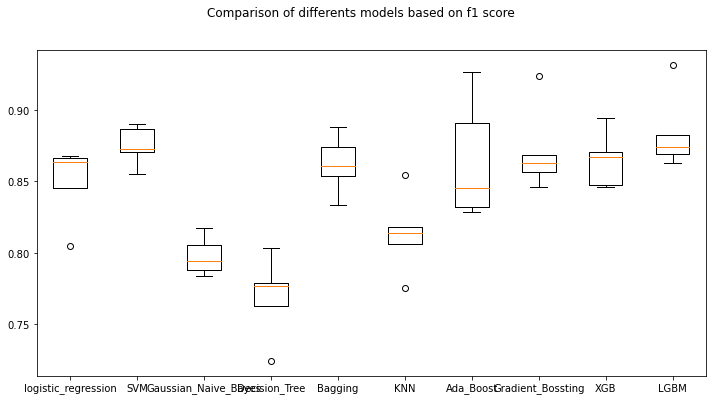

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(f1_scores)
ax.set_xticklabels(names)
fig.suptitle('Comparison of differents models based on f1 score')
plt.show()

# PCA

In [27]:
pca = PCA(n_components = 20, random_state = seed)
pca.fit(df_scaled)

print(f'Variance ratios are : \n \n {pca.explained_variance_ratio_} \n')
print(f'Sum of variance ratios is  : {pca.explained_variance_ratio_.sum()}')

Variance ratios are : 
 
 [0.12961998 0.09390046 0.08252524 0.04290164 0.03566432 0.0299512
 0.02510273 0.02214611 0.02035206 0.0182389  0.01767102 0.01495244
 0.01306856 0.01272897 0.01267692 0.01167645 0.01068159 0.01058348
 0.00949644 0.00935444] 

Sum of variance ratios is  : 0.6232929507468544


In [28]:
def plot_cum_variance(pca_transformer):

    plt.bar(range(0,len(pca_transformer.explained_variance_ratio_)), pca_transformer.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained                                      variance')
    plt.step(range(0,len(np.cumsum(pca_transformer.explained_variance_ratio_))), np.cumsum(pca_transformer.explained_variance_ratio_), where='mid',label='Cumulative                                         explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

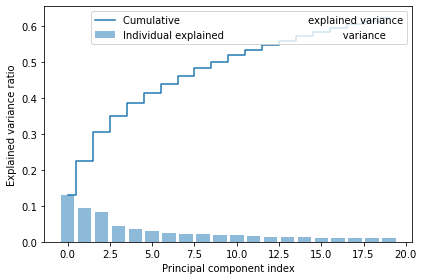

In [29]:
plot_cum_variance(pca)

In [30]:
def define_n_component_pca(data, percentage):

    n_comp = 2
    n_comp_optimal = True
    pca = PCA(n_components = n_comp, random_state = seed)
    pca.fit(data)
    current_percentage = np.sum(pca.explained_variance_ratio_)

    while n_comp_optimal : 

        # print(current_percentage)

        if current_percentage > percentage : 

            pca = PCA(n_components = n_comp, random_state = seed)
            pca.fit(data)
            # print(f'Number of principal component is : {n_comp}, with a cumulative variance of : {np.sum(pca.explained_variance_ratio_)}')
            n_comp_optimal = False
            

        else :

            # print('Adding one more component')
            n_comp += 1
            pca = PCA( n_components = n_comp, random_state = seed)
            pca.fit(data)
            current_percentage = np.sum(pca.explained_variance_ratio_)

        
    print(f'Number of principal component is : {n_comp}, with a cumulative variance of : {np.sum(pca.explained_variance_ratio_)}')
    return pca



Number of principal component is : 61, with a cumulative variance of : 0.8020190681039304


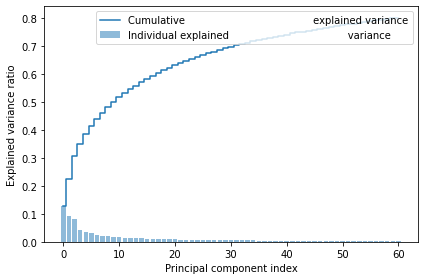

In [31]:
optimised_pca = define_n_component_pca(df_scaled, 0.8)
plot_cum_variance(optimised_pca)

In [32]:
df_scaled_pca = optimised_pca.fit_transform(df_scaled)

print(f'PCA reduction returns a dataset compressed and scaled of shape : {df_scaled_pca.shape}')

PCA reduction returns a dataset compressed and scaled of shape : (756, 61)


In [33]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_scaled_pca, labels, test_size = split_rate, random_state = seed, stratify = labels)

print(f'Shape of X_train_pca : {X_train_pca.shape}')
print(f'Shape of y_train_pca : {y_train_pca.shape}')

print(f'Shape of X_test_pca : {X_test_pca.shape}')
print(f'Shape of y_train_pca : {y_test_pca.shape}')

Shape of X_train_pca : (604, 61)
Shape of y_train_pca : (604,)
Shape of X_test_pca : (152, 61)
Shape of y_train_pca : (152,)


## Training models


### Logistic Regression

In [ ]:
LR_PCA_classifier = LogisticRegression(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

LR_PCA_parameters = [{ 'penalty' : ['l1','l2'],
                    'C' : [0.01,0.1,1.0,2.0,5.0,10.0],
                    'solver' : ['liblinear','newton-cg','lbfgs','saga'],
                    'max_iter' : [100,200,500]}]

LR_PCA_grid_search = GridSearchCV(estimator = LR_PCA_classifier, param_grid = LR_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
LR_PCA_grid_search = LR_PCA_grid_search.fit(X_train_pca, y_train_pca)

In [ ]:
print(f'Best logistic regressor is : {LR_PCA_grid_search.best_estimator_}, \n  with a score of : {LR_PCA_grid_search.best_score_}')


y_pred_LR_PCA =  LR_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_LR_PCA) 
print (cm)

print(classification_report(y_test,y_pred_LR_PCA))
print("Accuracy:",accuracy_score(y_test, y_pred_LR_PCA)*100)

### SVM

In [ ]:
SVM_PCA_classifier = SVC(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

SVM_PCA_parameters = [{ 'kernel' : ['linear','poly','rbf','sigmoid'],
                    'C' : [0.01,0.1,1.0,2.0,5.0,10.0],
                    'decision_function_shape' : ['ovo','ovr']}]

SVM_PCA_grid_search = GridSearchCV(estimator = SVM_PCA_classifier, param_grid = SVM_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
SVM_PCA_grid_search = SVM_PCA_grid_search.fit(X_train_pca, y_train_pca)

In [ ]:
print(f'Best SVM_PCA is : {SVM_PCA_grid_search.best_estimator_}, \n  with a score of : {SVM_PCA_grid_search.best_score_}')

y_pred_SVM_PCA =  SVM_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_SVM_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_SVM_PCA))
print("Accuracy:",accuracy_score(y_test, y_pred_SVM_PCA)*100)

### Gaussian Naive Bayes

In [ ]:
GNB_PCA_classifier = GaussianNB()
GNB_PCA_grid_search = GNB_PCA_classifier.fit(X_train_pca, y_train_pca)

In [ ]:
y_pred_GNB_PCA =  GNB_PCA_classifier.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_GNB_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_GNB_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_GNB_PCA)*100)

### Decision Tree

In [ ]:
DT_PCA_classifier = DecisionTreeClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

DT_PCA_parameters = [{ 'criterion' : ['gini','entropy'],
                    'splitter' : ['best','random'],
                    'max_depth' : [10,20,50,100,1000],
                    'min_samples_split' : [10,15,20,50],
                    'max_features' : ['auto', 'sqrt', 'log2']
                    }]

DT_PCA_grid_search = GridSearchCV(estimator = DT_PCA_classifier, param_grid = DT_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
DT_PCA_grid_search = DT_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('DT_PCA trained')

In [ ]:
print(f'Best Decison Tree is : {DT_PCA_grid_search.best_estimator_}, \n  with a score of : {DT_PCA_grid_search.best_score_}')
print('\n')

y_pred_DT_PCA =  DT_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_DT_PCA) 
print (cm)

print(classification_report(y_test_pca, y_pred_DT_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_DT_PCA)*100)

### Random Forest

In [ ]:
RF_PCA_classifier = RandomForestClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

RF_PCA_parameters = [{ 'n_estimators' : [10,20,50,100,250,500],
                    'criterion' : ['gini', 'entropy'],
                    'max_depth' : [10,20,50,100,1000],
                    'min_samples_split' : [10,15,20,50],
                    'max_features' : ['auto', 'sqrt', 'log2']
                    }]

RF_PCA_grid_search = GridSearchCV(estimator = RF_PCA_classifier, param_grid = RF_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
RF_PCA_grid_search = RF_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('RF_PCA trained')


In [ ]:
print(f'Best Random Forest is : {RF_PCA_grid_search.best_estimator_}, \n  with a score of : {RF_PCA_grid_search.best_score_}')
print('\n')

y_pred_RF_PCA =  RF_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_RF_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_RF_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_RF_PCA)*100)

### Bagging Classifier

In [ ]:

BG_PCA_classifier = BaggingClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

BG_PCA_parameters = [{ 'n_estimators' : [10,20,50,100,250,500],
                    'max_features' : [10,20,50,100]
                    }]

BG_PCA_grid_search = GridSearchCV(estimator = BG_PCA_classifier, param_grid = BG_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
BG_PCA_grid_search = BG_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('Bagging Classifier trained ! ')

In [ ]:
print(f'Best BAgging Classifier is : {BG_PCA_grid_search.best_estimator_}, \n  with a score of : {BG_PCA_grid_search.best_score_}')
print('\n')

y_pred_BG_PCA =  BG_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_BG_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_BG_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_BG_PCA)*100)

### KNN

In [ ]:
KNN_PCA_classifier = KNeighborsClassifier()
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

KNN_PCA_parameters = [{ 'n_neighbors' : [10,20,50,75],
                    'weights' : ['uniform','distance'],
                    'algorithm' : ['auto']
                    }]

KNN_PCA_grid_search = GridSearchCV(estimator = KNN_PCA_classifier, param_grid = KNN_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
KNN_PCA_grid_search = KNN_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('KNN_PCA trained ! ')

In [ ]:
print(f'Best KNN_PCA Classifier is : {KNN_PCA_grid_search.best_estimator_}, \n  with a score of : {KNN_PCA_grid_search.best_score_}')
print('\n')

y_pred_KNN_PCA =  KNN_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_KNN_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_KNN_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_KNN_PCA)*100)

### Ada Boost

In [ ]:
ADAB_PCA_classifier = AdaBoostClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

ADAB_PCA_parameters = [{ 'n_estimators' : [10,20,50,75,100,250],
                    'learning_rate' : [0.001,0.01,0.1,1.0]                    }]

ADAB_PCA_grid_search = GridSearchCV(estimator = ADAB_PCA_classifier, param_grid = ADAB_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
ADAB_PCA_grid_search = ADAB_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('ADAB_PCA trained ! ')

In [ ]:
print(f'Best ADAB_PCA Classifier is : {ADAB_PCA_grid_search.best_estimator_}, \n  with a score of : {ADAB_PCA_grid_search.best_score_}')
print('\n')

y_pred_ADAB_PCA =  ADAB_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_ADAB_PCA) 
print (cm)

print(classification_report(y_test_pca, y_pred_ADAB_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_ADAB_PCA)*100)

### Gradient Bossting Classifier

In [ ]:
GB_PCA_classifier = GradientBoostingClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

GB_PCA_parameters = [{ 'n_estimators' : [10,20,50,75,100,250],
                    'learning_rate' : [0.001,0.01,0.1,1.0],
                    'criterion' : ['friedman_mse','mse','mae']
                    }]

GB_PCA_grid_search = GridSearchCV(estimator = GB_PCA_classifier, param_grid = GB_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
GB_PCA_grid_search = GB_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('GB_PCA trained ! ')

In [ ]:
print(f'Best GB_PCA Classifier is : {GB_PCA_grid_search.best_estimator_}, \n  with a score of : {GB_PCA_grid_search.best_score_}')
print('\n')

y_pred_GB_PCA =  GB_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_GB_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_GB_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_GB_PCA)*100)

### XGB Classifier

In [ ]:
XGB_PCA_classifier = XGBClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

XGB_PCA_parameters = [{'nthread': [n_cores], #when use hyperthread, XGB_PCAoost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.001,0.05,0.1], #so called `eta` value
              'max_depth': [10,20,50,100],
              'min_child_weight': [10],
              'silent': [1],
              'subsample': [0.8,0.9,1.0],
              'colsample_bytree': [0.7],
              'n_estimators': [10,20,50,100], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [seed]}]

XGB_PCA_grid_search = GridSearchCV(estimator = XGB_PCA_classifier, param_grid = XGB_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
XGB_PCA_grid_search = XGB_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('XGB_PCA trained ! ')

In [ ]:
print(f'Best XGB_PCA Classifier is : {XGB_PCA_grid_search.best_estimator_}, \n  with a score of : {XGB_PCA_grid_search.best_score_}')
print('\n')

y_pred_XGB_PCA =  XGB_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_XGB_PCA) 
print (cm)

print(classification_report(y_test_pca, y_pred_XGB_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_XGB_PCA)*100)

#### LGBM CLassifier

In [ ]:
LGBM_PCA_classifier = LGBMClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

LGBM_PCA_parameters = [{'boosting_type': ['gbdt','dart','goss'], #when use hyperthread, LGBM_PCAoost may become slower
              'num_leaves':[50,75,100],
              'learning_rate': [0.05,0.1], #so called `eta` value
              'max_depth': [10,20,50,100],
              'n_estimators': [10,20,50,100], #number of trees, change it to 1000 for better results
            }]

LGBM_PCA_grid_search = GridSearchCV(estimator = LGBM_PCA_classifier, param_grid = LGBM_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
LGBM_PCA_grid_search = LGBM_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('LGBM_PCA trained ! ')

In [ ]:
print(f'Best LGBM_PCA Classifier is : {LGBM_PCA_grid_search.best_estimator_}, \n  with a score of : {LGBM_PCA_grid_search.best_score_}')
print('\n')

y_pred_LGBM_PCA =  LGBM_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_LGBM_PCA) 
print (cm)

print(classification_report(y_test_pca, y_pred_LGBM_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_LGBM_PCA)*100)

### Saving models

In [ ]:
models_pca_dict = {
    'logistic_regression_pca' : LR_PCA_grid_search.best_estimator_,
    'SVM_pca' : SVM_PCA_grid_search.best_estimator_,
    'Gaussian_Naive_Bayes_pca' : GNB_PCA_classifier,
    'Decision_Tree_pca' : DT_PCA_grid_search.best_estimator_,
    'Bagging_pca' : BG_PCA_grid_search.best_estimator_,
    'KNN_pca' : KNN_PCA_grid_search.best_estimator_,
    'Ada_Boost_pca' : ADAB_PCA_grid_search.best_estimator_,
    'Gradient_Boosting_pca' : GB_PCA_grid_search.best_estimator_,
    'XGB_pca' : XGB_PCA_grid_search.best_estimator_,
    'LGBM_pca' : LGBM_PCA_grid_search.best_estimator_
    

}

# save the model to disk

for key, value in models_pca_dict.items():

    filename = str(os.getcwd()) + '/' +  key + '.sav'
    print(filename)
    pickle.dump(value, open(filename, 'wb'))


### Reloading models

In [34]:
models_pca_path_dict = {
    'logistic_regression_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/logistic_regression_pca.sav',
    'SVM_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/SVM_pca.sav',
    'Gaussian_Naive_Bayes_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gaussian_Naive_Bayes_pca.sav' ,
    'Decision_Tree_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Decision_Tree_pca.sav',
    'Bagging_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Bagging_pca.sav',
    'KNN_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/KNN_pca.sav',
    'Ada_Boost_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Ada_Boost_pca.sav',
    'Gradient_Boosting_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gradient_Boosting_pca.sav',
    'XGB_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/XGB_pca.sav',
    'LGBM_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/LGBM_pca.sav'

}

models_pca_dict = {}

for key, value in models_pca_path_dict.items():
    print(key,value)

    try: 
        models_dict[str(key)] = pickle.load(open(value, 'rb'))
        print('ok')
    except : 
        print('fail')
models_pca_dict

test = pickle.load(open('/home/sebastien/Bureau/Parkinsons_Disease_Classification/SVM_pca.sav','rb'))
print(test)

logistic_regression_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/logistic_regression_pca.sav
ok
SVM_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/SVM_pca.sav
ok
Gaussian_Naive_Bayes_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/Gaussian_Naive_Bayes_pca.sav
ok
Decision_Tree_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/Decision_Tree_pca.sav
ok
Bagging_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/Bagging_pca.sav
ok
KNN_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/KNN_pca.sav
ok
Ada_Boost_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/Ada_Boost_pca.sav
ok
Gradient_Boosting_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/Gradient_Boosting_pca.sav
ok
XGB_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/XGB_pca.sav
ok
LGBM_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/LGBM_pca.sav
ok
SVC(C=10.0, decision_function_shape='ovo', random_state=42)


## Model's Evaluation

In [35]:
cv_pca = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)

f1_scores_pca = []
names_pca = []

for name, model in models_pca_dict.items():
    scores = cross_val_score(model, df_scaled, df['class'], scoring = 'f1_weighted', cv = cv_pca, n_jobs = n_cores)
    f1_mean = scores.mean()
    f1_std = scores.std()
    print(f"{name} : Mean ROC {f1_mean} STD:({f1_std})")
    f1_scores_pca.append(scores)
    names_pca.append(name)

print('Evaluation done !')

f1_scores_pca

Evaluation done !


[]

# Ploting results with PCA Compression

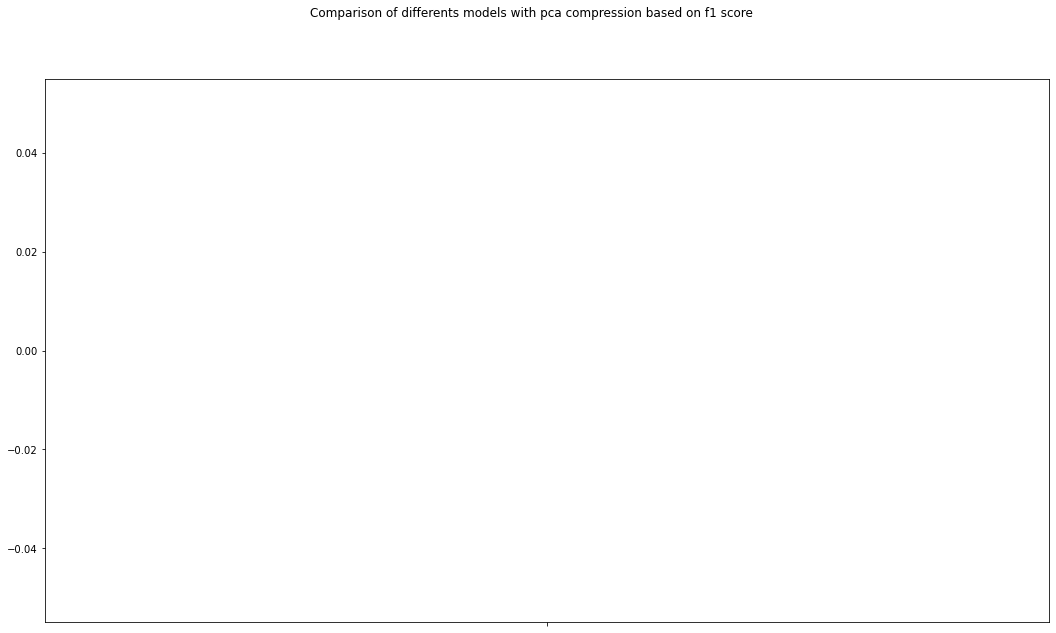

In [36]:
fig, ax = plt.subplots(figsize=(18,10))
ax.boxplot(f1_scores_pca)
ax.set_xticklabels(names_pca)
fig.suptitle('Comparison of differents models with pca compression based on f1 score')
plt.show()

## Neural Networks

In [52]:
model = Sequential([

    tf.keras.layers.Input(shape = [X_train.shape[1]], dtype = tf.float32),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [53]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                48256     
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)                256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)              

In [58]:
fBestModel = 'best_model.h5' 
early_stop = EarlyStopping(monitor='val_accuracy', patience=100, verbose=1) 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=500, 
          batch_size=62, verbose=True, callbacks=[best_model, early_stop])

8882
Epoch 98/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 0.9983 - val_loss: 0.6819 - val_accuracy: 0.8947
Epoch 99/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 0.9967 - val_loss: 0.6396 - val_accuracy: 0.8882
Epoch 100/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0067 - accuracy: 0.9950 - val_loss: 0.6669 - val_accuracy: 0.8947
Epoch 101/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0203 - accuracy: 0.9967 - val_loss: 0.7038 - val_accuracy: 0.8947
Epoch 102/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.6872 - val_accuracy: 0.8947
Epoch 103/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0030 - accuracy: 0.9983 - val_loss: 0.6693 - val_accuracy: 0.8882
Epoch 104/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0189 - accuracy: 0.9950 - val_loss: 0.6145 - val_accuracy: 0.9

In [59]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: ', score[1]*100)
print( 'loss:', score[0]*100)

5/5 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.9211
Accuracy:  92.1052634716034
loss: 49.531289935112


In [60]:
prediction = model.predict(X_test)
prediction = (prediction > 0.5)


In [63]:
print(metrics.classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       0.94      0.74      0.83        39
           1       0.92      0.98      0.95       113

    accuracy                           0.92       152
   macro avg       0.93      0.86      0.89       152
weighted avg       0.92      0.92      0.92       152

